# Statistics

- We have covered fitting a mathematical model to data
- How do we determine if the model parameter values are "significant"? And what does that mean?
- It's important to understand data, the error associated with data and how interpreting data impacts our models.
- Here, we'll focus on the most basic types of data distributions and statistics
    - Normally distributed data and the Z statistic
    - t statistic
    - Fisher exact tests

# Brute force approach

- we'll use brute force (i.e. bootstrapping) to help us better understand a statistic and its significance (p value)
- in short, since computers can collect a lot of samples quickly, we'll use them to create distributions
- will help better understand where certain distributions, like variations of the t distribution, come from

# What is a statistic?
- p values are not statistics!
- A statistic summarizes characteristics of a population of measurements
    - Average, median, standard error, standard deviation
- One we think less of
    - t, z, u


# Statistics and linear regression
- It turns out that the parameters of linear regression often map to a mean of the data
- We'll go into detail about this later
- But it's worth knowing in advanced that statistics tools, like ANOVA, and linear regression can be used interchangeably to analyze data


# Normally distributed data: The origin story
- Was first a mathematical convenience in the 1730s to find nice relationship between mean and variance. 
- Expanded by Gauss 100 years later (1820s) when studying the "arithmetic mean of measured values"
- Not until late 1800s did its value in modeling physical systems become established (Maxwell)

0.018 0.005399096651318806 in percentages


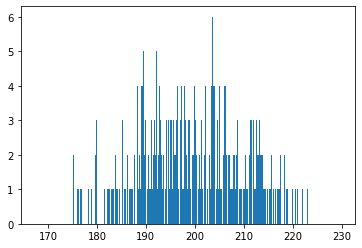

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

mu = 200
sigma = 10
bins = 500
data = np.random.normal(mu, sigma, bins)
plt.subplots()
plt.hist(data, bins = bins)
pvalue = (sum(data >= 220)/bins)
pvalue2 = stats.norm.pdf(x = 220, loc = mu, scale = sigma)
print(pvalue, pvalue2, "in percentages")

# Normal Distribution Characterics
- Normal distribution comes from solving the probability density function (PDF):
    - $\frac{1}{\sigma * \sqrt{2 \pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $
- The area below the curve of this equation is 1 for all values of $\mu$ and $\sigma$
- Ultimately, the **area below the curve is the most important feature** for a PDF as it tells us the likelihood of a range of values occuring.
- A standard deviation, $\sigma$, defines the distance from the mean such that $\pm 1\sigma$
from the mean encompasses ~ 68% of the data and $\pm 2\sigma$ encompasses ~95%.
- These properties hold true regardless of the specific mean and standard deviation of the normal population.
 - **Let's generate a plot of a normal distribution with a mean ($\mu$) of 3 and a standard deviation of standard deviation ($\sigma$) of 5**


[197.         197.06060606 197.12121212 197.18181818 197.24242424
 197.3030303  197.36363636 197.42424242 197.48484848 197.54545455
 197.60606061 197.66666667 197.72727273 197.78787879 197.84848485
 197.90909091 197.96969697 198.03030303 198.09090909 198.15151515
 198.21212121 198.27272727 198.33333333 198.39393939 198.45454545
 198.51515152 198.57575758 198.63636364 198.6969697  198.75757576
 198.81818182 198.87878788 198.93939394 199.         199.06060606
 199.12121212 199.18181818 199.24242424 199.3030303  199.36363636
 199.42424242 199.48484848 199.54545455 199.60606061 199.66666667
 199.72727273 199.78787879 199.84848485 199.90909091 199.96969697
 200.03030303 200.09090909 200.15151515 200.21212121 200.27272727
 200.33333333 200.39393939 200.45454545 200.51515152 200.57575758
 200.63636364 200.6969697  200.75757576 200.81818182 200.87878788
 200.93939394 201.         201.06060606 201.12121212 201.18181818
 201.24242424 201.3030303  201.36363636 201.42424242 201.48484848
 201.54545

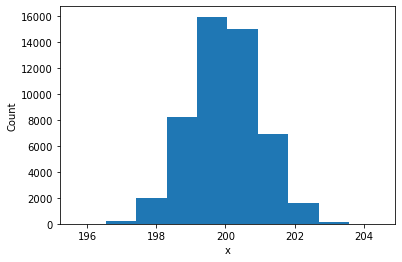

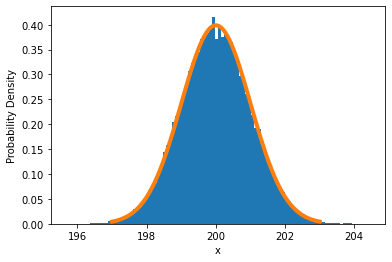

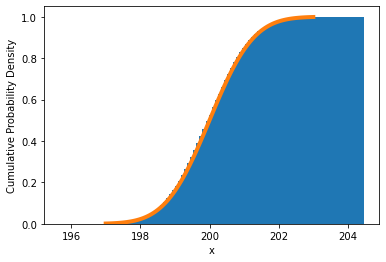

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 200;
sigma = 1;

norm_data = np.random.normal(mu,sigma,50000);
plt.subplots();
plt.hist(norm_data);
plt.xlabel("x");
plt.ylabel("Count");

plt.subplots();
plt.hist(norm_data, density = True,bins = 100);
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100);
#print(x)
plt.plot(x, stats.norm.pdf(x, mu, sigma), linewidth = 4);
plt.xlabel("x");
plt.ylabel("Probability Density");

plt.subplots();
plt.hist(norm_data, 100, density=True, cumulative=True);
plt.plot(x, stats.norm.cdf(x, mu, sigma), linewidth = 4);
plt.xlabel("x");
plt.ylabel("Cumulative Probability Density");

1000
For t =  1.4757881266270942  our 1 sided p value is  0.106


Ttest_1sampResult(statistic=1.4757881266270942, pvalue=0.10701872945217943)

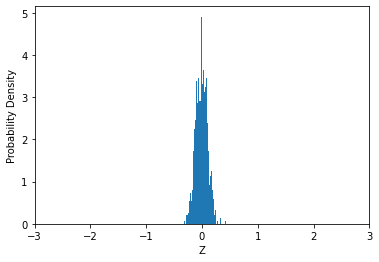

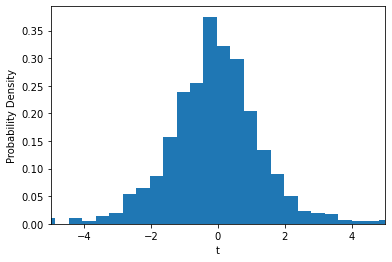

In [8]:
import random

averages = np.zeros(1000);
weighted_averages = np.zeros(1000);
for m in np.arange(0,1000,1):
    tmp = random.sample(list(norm_data),5);
    averages[m] = (np.mean(tmp)-mu)/sigma*np.sqrt(5); 
    weighted_averages[m] = (np.mean(tmp)-mu)/np.std(tmp)*np.sqrt(4)

plt.hist(averages, density = True,bins = 50);
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100);
plt.plot(x, stats.norm.pdf(x, mu, sigma/2), linewidth = 4);
plt.xlabel("Z");plt.xlim(-3,3);
plt.ylabel("Probability Density");

print(sum(abs(averages) <= 1))

plt.subplots();
plt.hist(weighted_averages, density = True,bins = 50);
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100);
plt.plot(x, stats.norm.pdf(x, mu, sigma), linewidth = 4);
plt.xlabel("t");plt.xlim(-5,5);
plt.ylabel("Probability Density");

tmp = [210,240,190,230,199]
t = (np.mean(tmp)-mu)/np.std(tmp,ddof=0)*np.sqrt(4)

print("For t = ", t, " our 1 sided p value is ",sum(weighted_averages >= t)/1000)
stats.ttest_1samp(tmp,200,alternative = "greater")

# Normal Distribution Characterics
- It is a plot of the probability density - NOT THE PROBABILITY.
    - The exact value of the PDF at a specific value of x is typically not very informative
    - E.g. with a mean of zero and $\sigma = 1$, if we get a value of x = 1, the PDF ~ 0.24. This **does not mean** that when randomly sampling this population, you are expected to get a value of 1 24% of the time.
    - Instead, the curve helps estimate the likelihood of getting a **range of values of x**, and that likelihood is the area below the curve!
    - E.g. the odds of gettting a value of x greater than 0 is ~50%, or half the area below the curve.
- The area under the curve is the most important factor for using normal distributions to interpret data

# What data is nearly normally distributed?
- **A LOT**
- Physiology measures: Height, weights, and so on; performance metrics: bowling averages (in the short term), grades; Quantum mechanics (Maxwell)
- Emphasis on nearly. Normalcy is an ideal used to approximate reality.
- Since many natural processes are normally distributed, its common to assume normalcy

# Two stats we'll consider: z and t
- z:
    - "Given a single value, what are the odds of getting that value or higher/lower?"
    - The value of z and its intepretation is basically how your naturally read a normal curve.
    - $\mu$ and $\sigma$ must be known or assumed.
    - Can be useful in machine learning tasks
- t:
    - "Given N values/samples, what are the odds of getting a t of equal and higher/lower value?"
    - The interpretation of t's significance come from the t distribution which is derived from normal distributions.
    -  $\mu$ is determined from the samples while $\sigma$ may be assumed or estimated.
        - There is more than 1 type of t

# Z is another way to say standard deviation
- **You already know Z, just not by name**. This is the most basic statistic we often learn and is basically just how you naturally read a normal curve.
- **Z is simply the # of standard deviations from the mean a measurement, x, is.**
- $Z = \frac{x-\mu}{\sigma}$
- The calculation tranforms a normal distribution with a mean, $\mu$, and standard deviation, $\sigma$, to a normal distribution with a mean equal to zero and a standard deviation equal to 1. The Z standardized curve is often call a Z curve. 
- The "units" of Z is standard deviations. I.e. if you calculate a Z = 1.3, the correct way to write this is Z = 1.3 $\sigma$ in order to clearly indicate that the measurement in question is 1.3 $\sigma$ from the mean.
- The assumptions related to using Z is that the data the sample is drawn from is normally distributed with a known mean and standard deviation.
    - Because of these assumptions, Z can only be used when $\mu$ and $\sigma$ are known OR when very large sample sizes can be generated cheaply.

# Example using Z
- Someone has been measuring the heights of elephants around the world and finds that, after 100,000's of measurments, the data is normally distributed with the average height being 9 feet with a standard deviation of 1.2 feet.
- You go on walk through Thailand and bump into an elephant, what are the odds that the elephant is 10.0 feet **OR TALLER?**

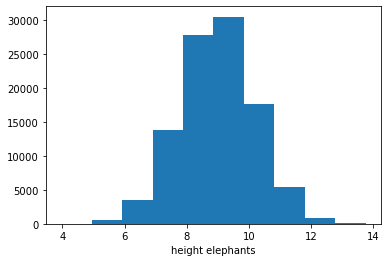

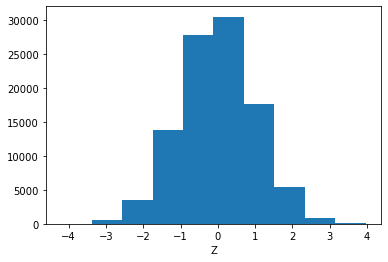

Value of Z =  0.8333333333333334
The odds of finding an elephant that is 10 feet or taller (aka the one side p value) is  0.20069
Odds of height greater than or equal to 10 feet =  0.20232838096364314


In [9]:
# Let's create a normal distribution with 100,000 points to represent our elephant population
elephant_pop = np.random.normal(9,1.2,100000);
plt.hist(elephant_pop);plt.xlabel("height elephants");
plt.show()

# Apply the Z equation to the data to perform a "z transform". Now the transformed data is centered around zero
# and the standard deviation is now equal to 1. In other words, a Z distribution is a normal distribution
# with a mu = 0 and a sigma = 1;
z_transformed_pop = (elephant_pop-9)/1.2;
plt.subplots();
plt.hist(z_transformed_pop);plt.xlabel("Z");
plt.show();

# Now using a Z test, lets find the Z value associated with our 10 feet elephant
Z = (10-9)/1.2;
print("Value of Z = ",Z);

# We can use our z_transformed_pop to estimate the odds of finding an elephant that is 10 feet or larger. This will be
# our one-sided p value
p = sum(z_transformed_pop >= Z)/100000;
print("The odds of finding an elephant that is 10 feet or taller (aka the one side p value) is ",p)

# And since a Z curve is a normal distribution with mean = 0 and sd =1, we can
# use the cumulative probability function to solve this as well
print("Odds of height greater than or equal to 10 feet = ",1-stats.norm.cdf(Z))

# One tailed vs Two tailed; Greater or lesser
- The significance of a statistic, like Z, is what we call a p value.
- But a p value requires extra information to have meaning!
- As shown above, we found that the odds of an elephant having a height greater or equal to 10 feet is 20.2%.
    - This is an example of a one-sided p-value of 0.202 
    - Can be referred to as the "right-sided p value" or "greater-sided p value"
    - We could have found the left-sided p value as well
- Commonly you see two-sided p values used.
    - Interpretation "Odds of seeing a value this far from the mean"
    - Calculated by finding the lowest one-sided p value and then multiplying by 2
    - Works well for normal distributions and other symmetric distributions - but not all distributions are symmetric.

# Population vs sample
- "Population" refers to statistics derived from all possible data. Often derived from large datasets.
    - AKA the true mean, the global mean, etc.
- "Sample" refers to statistics derived from a subset

# From Z to t
- Z stats are easy, really just read the normal curve
    - Only apply to 1 data point
    - But require the population mean and standard deviations to be know!
- t statistics are also easy so long as you know to make the t distribution and then read it in the same way that we read normal distributions.
    - We'll use bootstrapping to generate t distributions
    - Apply when population standard deviation and mean are not known
- t tests tend to be very common as not knowing the true population mean and standard deviation is pretty common, which brings us to two important terms: population level statistics and sample statistics

# The "expected range of values"

Before thinking about a t test, null hypothesis and all that, let's get to understand what it means to randomly sample a normal distribution.

Write a loop code wherein each loop interation you collect 4 random samples from a normal distribution that has a mean of zero and a standard devation of 1 and calculate the mean of the 4 samples. For each iteration, save the value of the mean. After 1000 iterations is completed and 1000 means are determined, plot a histogram of the resulting means. 

# The "expected range of values"

- Regardless of the statistic used, whenever you randomly sample a distribution 1000s of times, you will observe a distribution of the chosen statistic. 
- In our case, means near zero are common, you could even say expected, whereas values far from zero are very rare.
- This is the heart of statistics. We start with a hypothesis on what the mean of a population is and sometimes the standard deviation as well, and then ask, what are my expected value of a chosen statistic. 
- Once we know what values are expected, we can also decided on what values are rare or unlikely.

# Short explanation of a t test
- t test tests the likelihood of obtaining a value of t from a normal population
- t is a weighted mean in a sense. More specifically, t is the difference between two means divided by (weighted by) a standard deviation.
- There is more than 1 way to perform a t test. We will start with a single sample t test and move on to other types of t tests later.

# "Single sample" t test
- One, it should be noted that researchers working at Guinness Brewer are often credited with creating the t test while studying barley...
- $t = \frac{\bar{X}-\mu}{\bar{\sigma}}\sqrt{n}$ where
    - $\bar{X}$ is the sample mean
    - $\mu$ is a hypothesized mean
    - n is the # of measurements collected 
    - $\bar{\sigma}$ is the sample standard deviation
- And it is assumed that all data measured comes from a normal distribution.

Our t value for these 5 samples is 1.46 and our p value for finding a larger t value is 0.89


Ttest_1sampResult(statistic=1.4757881266270942, pvalue=0.10701872945217943)

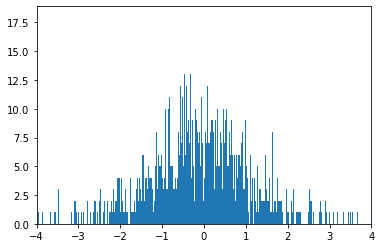

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from random import randrange

tlist = []
mu = 200
sigma = 10
bins = 500
data = np.random.normal(mu, sigma, bins)
population = 10000
sample = (210, 240, 190, 230, 199)
ts = np.sqrt(5)*(sum(sample)/len(sample)-sum(data)/len(data))/(np.std(sample, ddof=1))

for k in range (1, population):
    s1 = data[randrange(bins)]
    s2 = data[randrange(bins)]
    s3 = data[randrange(bins)]
    s4 = data[randrange(bins)]
    s5 = data[randrange(bins)]
    sset = (s1, s2, s3, s4, s5)
    setavg = sum(sset)/len(sset)
    datavg = sum(data)/len(data)
    setstd = np.std(sset, ddof=1)
    t = np.sqrt(5)*((setavg)-(datavg))/(setstd)
    tlist.append(t)

plt.subplots()
plt.hist(tlist, bins=population)
plt.xlim([-4, 4])
pvalue = (sum(ts >= tlist)/population)
print("Our t value for these 5 samples is", round(ts,2), "and our p value for finding a larger t value is", round(pvalue,2))
stats.ttest_1samp(sample, mu, alternative = "greater")



# On the hypothesized mean
- This is a common area for people to struggle.
- $\mu$ is often a guess of the mean of the population we are studying.
- For example, if we are studying the height of men and we think a group we are studying may differ in height than other men, we can postulate the average height of a man is 5 feet and 10 inches. 

# Creating the t null distribution

- For any statistic, we need to be able to generate a distribution of expectations. I.e., what values of t are expected under certain conditions.
- The simplest condition to analyze is the null hypothesis that the mean of your sample ($\bar{X}$) equals the mean of the population ($\mu$) that was sampled.
    - Even when we know the mean of the population, if we pull random samples from the population, we expected some varition to occur. If we pull 3 samples from a Z curve and average them, we'd expect the value to be close to zero. But not exactly zero and not the same value everytime we pull random values from our Z curve.
- This is how we create a **null distribution of t values**. In other words, a distribution of t values that results from samples a **known, normal distribution**.

Step 1: Generate a normally distributed population.

Let's start by ensuring we understand how to sample normally distributed data. Using random.norm from numpy, randomly sample 10,000 values from a normal distribution whose mean is 12 and standard deviation is 2. Save the values in a variable called norm_data. Plot a histogram of the collected values and then plot a density plot of the collected values. 

# Creating the t null distribution

Step 2: Use your normally distributed population to generate a null distribution of t values for **when n = 3.**

The idea of a null hypothesis can be tricky without some practice. To generate a null hypothesis for any statistic requires choosing representative values, in this case for the population mean $\mu$. Ultimatelty, we are asking "if I know the what my population is, then how much variation is expected in the value of t when I collect data from my defined population?" 

To do this, write a for-loop in which you collect 3 samples from your normal distribution data (norm_data) above and calculate t. Iterate through this loop 1000 times and for each iteration, calculate and save the t statistic. Plot a histogram of the collected values and then plot a density plot of the collected values.

# Check that distribution works correctly.

Let's ensure that we can use our distribution to estimate a p value. You take 3 random measurements and get these numbers: 9.45, 10.3, and 11. Calculate your t value (call is t_val) and use your t distribution to estimate the odds of obtaining a t that is less than or equal to t_val. 

Check your answer by using stats.ttest_1samp to compare your p value with a p value calculated using the stats library.

# Does changing the number of samples collected (n) change the t distribution?

Step 3: Repeat step 2 but collect 6 samples for each iteration. How do the density plots compare?

# Does changing the mean and standard deviation of the population change the t distribution?

Step 4: We will skip step 1 this time and just directly pull samples from the population using random.norm($\mu$,$\sigma$,n=3). Write a for-loop in which you collect 3 samples from a normal distribution that has a mean of 6 and a standard deviation of 3 and calculate t. Iterate through this loop 1000 times and for each iteration, calculate and save the t statistic. Plot a histogram of the collected values and then plot a density plot of the collected values.

# Our takeways so far
- Z is just your basic statitic to explain normal curves
    - Z has the units of standard deviations (like height being measured in inches)
- t is used to determine the likelihood of obtaining a value of t with n measurements sampled from a normal distribution.
    - Interesting, the effect of n and the choice of $\mu$ and $\sigma$: **YOU COMMENT HERE :-)**
- Note we have only covered the "single sample" t test here. A more commonly used t test is the two sample, which we'll cover next.